In [4]:
# Importing required libraries
import pandas as pd
import numpy as np

In [5]:
# Simulate returns data
returns_data = pd.DataFrame({
    'order_id': np.arange(1000, 1100),
    'product_id': np.random.randint(100, 200, 100),
    'return_status': np.random.choice([0, 1], 100, p=[0.8, 0.2]),  # 0: not returned, 1: returned
    'reason': np.random.choice(['Defective', 'Not as described', 'Changed mind', 'Other'], 100)
})

# Simulate feedback data
feedback_data = pd.DataFrame({
    'product_id': np.random.randint(100, 200, 300),
    'feedback': np.random.choice(['Great product', 'Terrible quality', 'Not worth the price', 'Very satisfied'], 300)
})

# Simulate quality data
quality_data = pd.DataFrame({
    'product_id': np.arange(100, 200),
    'quality_score': np.random.uniform(1, 5, 100)  # Scores between 1 and 5
})

# Simulate sales data
sales_data = pd.DataFrame({
    'order_id': np.arange(1000, 1100),
    'product_id': np.random.randint(100, 200, 100),
    'sales_amount': np.random.uniform(10, 500, 100)
})

In [6]:
display(returns_data.head())
display(feedback_data.head())
display(quality_data.head())
display(sales_data.head())

,order_id,product_id,return_status,reason
0,1000,102,0,Defective
1,1001,187,0,Other
2,1002,194,0,Not as described
3,1003,142,0,Other
4,1004,184,0,Other


,product_id,feedback
0,164,Not worth the price
1,197,Very satisfied
2,182,Great product
3,148,Not worth the price
4,190,Great product


,product_id,quality_score
0,100,3.080288
1,101,4.033624
2,102,3.164430
3,103,2.441046
4,104,3.301526


,order_id,product_id,sales_amount
0,1000,140,23.233732
1,1001,141,460.093109
2,1002,177,240.658387
3,1003,135,462.705988
4,1004,109,154.956381


In [7]:
data = returns_data.merge(feedback_data, on='product_id').merge(quality_data, on='product_id').merge(sales_data, on='order_id')

In [8]:
data.fillna(method='ffill', inplace=True)

<ipython-input-8-519281724d28>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


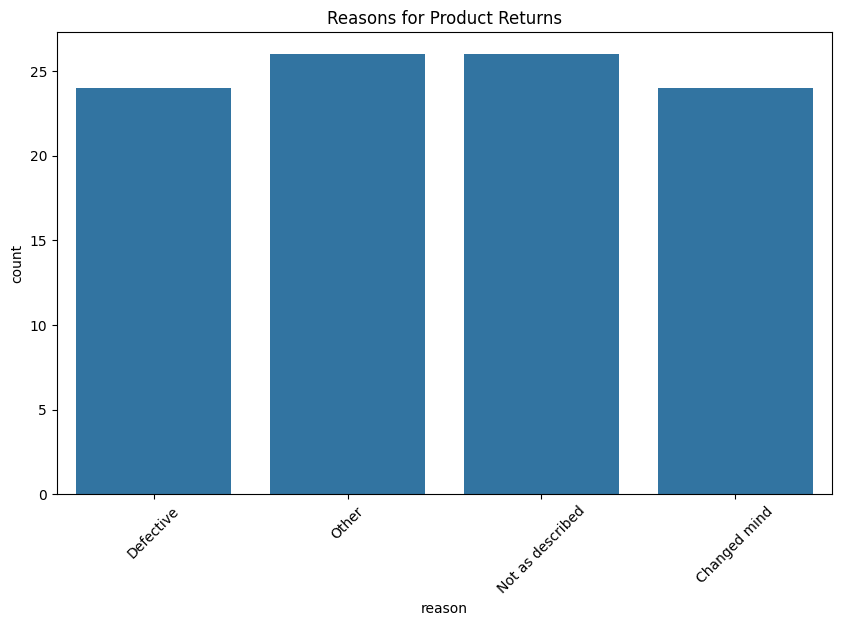

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(x='reason', data=returns_data)
plt.title('Reasons for Product Returns')
plt.xticks(rotation=45)
plt.show()

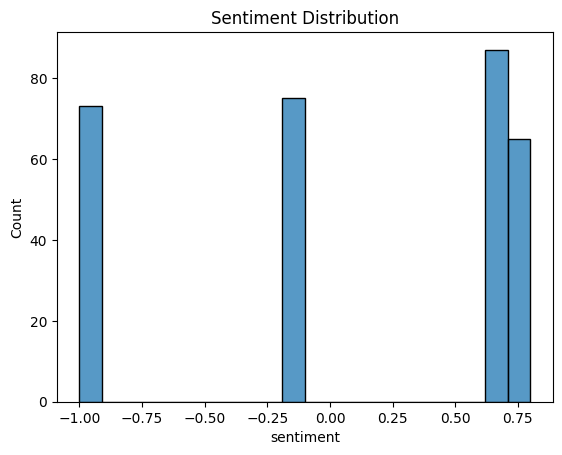

In [10]:
from textblob import TextBlob

feedback_data['sentiment'] = feedback_data['feedback'].apply(lambda x: TextBlob(x).sentiment.polarity)
sns.histplot(feedback_data['sentiment'], bins=20)
plt.title('Sentiment Distribution')
plt.show()

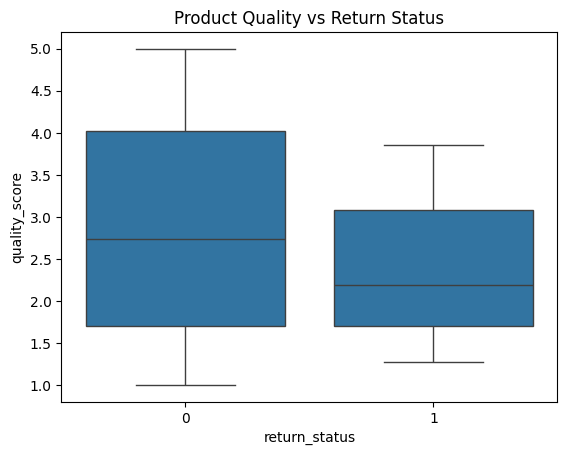

In [12]:
sns.boxplot(x='return_status', y='quality_score', data=data)
plt.title('Product Quality vs Return Status')
plt.show()